In [46]:
import pandas as pa
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#Comment créer un tableau de data 
T = pa.DataFrame()
T['Prix'] = [1,2,3,4,5,6,7,8,9]
T['Ventes'] = [10,9,8.3,7.5,5.4,4.6,3.7,2.8,1.9]

In [2]:
T

,Prix,Ventes
0,1,10.0
1,2,9.0
2,3,8.3
3,4,7.5
4,5,5.4
5,6,4.6
6,7,3.7
7,8,2.8
8,9,1.9


In [3]:
T.describe()

,Prix,Ventes
count,9.000000,9.000000
mean,5.000000,5.911111
std,2.738613,2.896741
min,1.000000,1.900000
25%,3.000000,3.700000
50%,5.000000,5.400000
75%,7.000000,8.300000
max,9.000000,10.000000


In [6]:
P = pa.read_csv('actions.csv')
#représentation en nuage de point et utilisation du point moyen (xi,yi) d'un jeu de donnée -> (xm,ym)


In [23]:
P['Carrefour'][0]

0.0126

/tmp/ipykernel_6572/4053553917.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mx = P.mean()[0]
/tmp/ipykernel_6572/4053553917.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  my = P.mean()[1]


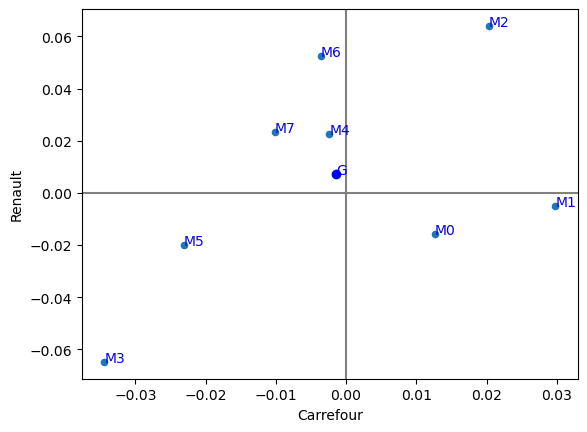

In [27]:
#Création du nuage de point et des axes
P.plot.scatter(x = 'Carrefour',y = 'Renault')
pl.axhline(y = 0,color = 'gray')
pl.axvline(x = 0,color = 'gray')

#Création du point moyen 
mx = P.mean()[0]
my = P.mean()[1]
pl.plot(mx,my,'o',color = 'blue')
pl.text(mx,my,'G',color = 'blue')

for i in range(len(P['Carrefour'])):
    pl.text(P['Carrefour'][i],P['Renault'][i],'M'+str(i),color = 'blue')


In [30]:
#question qu'on se pose: les actions de carrefour et renault evolue telle de concert soit rx = xi-xm et ry=yi_ym 
#sont de même signes ou de signe contraire 

P['RX'] = P['Carrefour']-mx
P['RY'] = P['Renault']-my
P['RX*RY'] = P['RX']*P['RY']

In [31]:
P

,Date,Carrefour,Renault,RX,RY,RX*RY
0,2020-06-19,0.0126,-0.0158,0.013962,-0.0229,-0.000320
1,2020-06-22,0.0298,-0.0052,0.031162,-0.0123,-0.000383
2,2020-06-23,0.0203,0.0640,0.021662,0.0569,0.001233
3,2020-06-24,-0.0344,-0.0648,-0.033037,-0.0719,0.002375
4,2020-06-25,-0.0024,0.0227,-0.001037,0.0156,-0.000016
5,2020-06-26,-0.0231,-0.0199,-0.021737,-0.0270,0.000587
6,2020-06-29,-0.0036,0.0525,-0.002237,0.0454,-0.000102
7,2020-06-30,-0.0101,0.0233,-0.008737,0.0162,-0.000142


In [34]:
P['RX*RY'].mean()
#en moyenne les actions de carrefour et renault evoluent de concert par rapport a leur moyenne

0.0004040687499999999

/tmp/ipykernel_6572/3028340239.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mx = P.mean()[0]
/tmp/ipykernel_6572/3028340239.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  my = P.mean()[1]


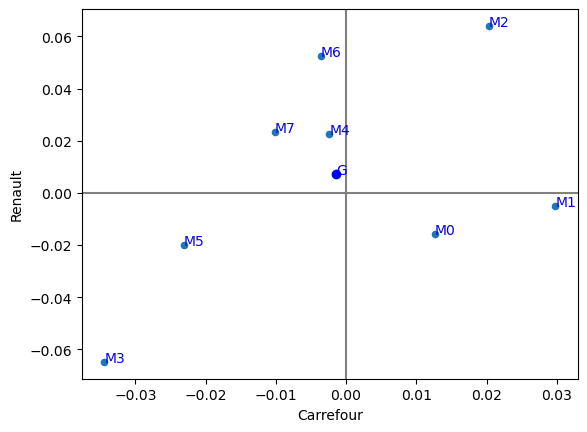

In [52]:
#data visu de la covariance on construitr un rectangle de coingauche G, droit Mi et d'aire (xi-xm)(yi-ym)
#Création du nuage de point et des axes
P.plot.scatter(x = 'Carrefour',y = 'Renault')
pl.axhline(y = 0,color = 'gray')
pl.axvline(x = 0,color = 'gray')

#Création du point moyen 
mx = P.mean()[0]
my = P.mean()[1]
pl.plot(mx,my,'o',color = 'blue')
pl.text(mx,my,'G',color = 'blue')

for i in range(len(P['Carrefour'])):
    pl.text(P['Carrefour'][i],P['Renault'][i],'M'+str(i),color = 'blue')


/tmp/ipykernel_6572/807930840.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mx = P.mean()[0]
/tmp/ipykernel_6572/807930840.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  my = P.mean()[1]


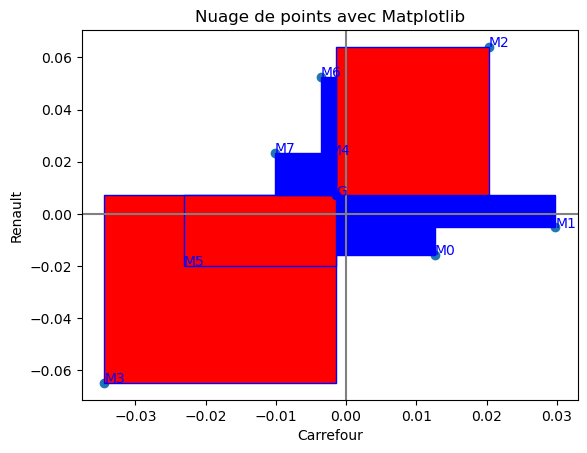

In [88]:
fig, ax = plt.subplots()
#fig = plt.figure() 
#ax = fig.add_subplot()

plt.scatter(x = P['Carrefour'],y = P['Renault'])
cov = 0
mx = P.mean()[0]
my = P.mean()[1]
plt.plot(mx,my,'o',color = 'blue')
plt.text(mx,my,'G',color = 'blue')

#data visulation de la covariance chaque aire correspond a (xi-xm)(yi-ym)
for i in range(len(P['Carrefour'])):
    pl.text(P['Carrefour'][i],P['Renault'][i],'M'+str(i),color = 'blue')
    if P['Carrefour'][i]*P['Renault'][i]>0:
        rect = plt.Rectangle((mx,my), P['Carrefour'][i]-mx, P['Renault'][i]-my, edgecolor = 'blue',facecolor = 'red',fill=True)
        ax.add_patch(rect)
        cov += P['Carrefour'][i]*P['Renault'][i]
    else :
        rect = plt.Rectangle((mx,my), P['Carrefour'][i]-mx, P['Renault'][i]-my, edgecolor = 'blue',facecolor = 'blue',fill=True)
        ax.add_patch(rect)
        cov += P['Carrefour'][i]*P['Renault'][i]
    
    
plt.title('Nuage de points avec Matplotlib')
plt.axhline(y = 0,color = 'gray')
plt.axvline(x = 0,color = 'gray')
plt.xlabel('Carrefour')
plt.ylabel('Renault')
plt.show()

In [90]:
print(cov/len(P['Carrefour']))
#Remarque, si la covariance est nulle ya pas de corrélation entre les deux jeux, si positive corélés positivement ou vegativement

0.00039439499999999997
